# 목표: 분류 모델이 틀린 예시들을 직접 살펴보기

In [1]:
import pandas as pd

df = pd.read_csv('result.csv')

# use some aliases (for plotting later)
for column in ['artist', 'label_predicted', 'label_predicted_second']:
    df[column] = (df[column]
                  .str.replace('Rage Against the Machine', 'RATM')
                  .str.replace('Red Hot Chili Peppers', 'RHCP'))

# 오답 살펴보기

In [2]:
pd.options.display.max_rows = 200


df['is_correct'] = (df['artist'] == df['label_predicted'])
df[~df['is_correct']]

,artist,album,title,seg_id,label_predicted,score,label_predicted_second,score_second,is_correct
5,Epik High,"Pieces, Pt. 1",Décalcomanie,13,Suede,0.984698,Epik High,0.005935,False
7,Epik High,"Pieces, Pt. 1",Décalcomanie,15,브로콜리 너마저,0.826439,Epik High,0.080353,False
37,Epik High,"Pieces, Pt. 1",Eight by Eight,7,Mika,0.465599,Epik High,0.461961,False
60,Fall Out Boy,Infinity on High,Golden,0,Suede,0.499197,Fall Out Boy,0.331947,False
62,Fall Out Boy,Infinity on High,Golden,10,Suede,0.331037,Fall Out Boy,0.282660,False
63,Fall Out Boy,Infinity on High,Golden,11,RHCP,0.362180,Fall Out Boy,0.336367,False
64,Fall Out Boy,Infinity on High,Golden,12,RHCP,0.957982,Fall Out Boy,0.011835,False
66,Fall Out Boy,Infinity on High,Golden,14,Suede,0.953879,RHCP,0.011137,False
73,Fall Out Boy,Infinity on High,Golden,3,Suede,0.598212,Fall Out Boy,0.172244,False
79,Fall Out Boy,Infinity on High,Golden,9,브로콜리 너마저,0.753112,RHCP,0.129556,False


### 자신있게 틀린 것들을 따로 모아보기


In [3]:
df[(~df['is_correct']) & (df['score'] > 0.95)]

,artist,album,title,seg_id,label_predicted,score,label_predicted_second,score_second,is_correct
5,Epik High,"Pieces, Pt. 1",Décalcomanie,13,Suede,0.984698,Epik High,0.005935,False
64,Fall Out Boy,Infinity on High,Golden,12,RHCP,0.957982,Fall Out Boy,0.011835,False
66,Fall Out Boy,Infinity on High,Golden,14,Suede,0.953879,RHCP,0.011137,False
122,Mika,Life in Cartoon Motion,Happy Ending,10,Mr.Big,0.959780,Mika,0.016551,False
126,Mika,Life in Cartoon Motion,Happy Ending,14,Suede,0.982210,Epik High,0.006278,False
139,Mika,Life in Cartoon Motion,Happy Ending,9,Mr.Big,0.959780,Mika,0.016551,False
145,Mika,Life in Cartoon Motion,My Interpretation,13,Fall Out Boy,0.951050,Mika,0.023917,False
170,Mr.Big,Next Time Around,Addicted To That Rush,18,Muse,0.983491,브로콜리 너마저,0.006769,False
188,Mr.Big,Next Time Around,Promise Her The Moon,16,Suede,0.981364,Muse,0.004284,False
240,Muse,Black Holes and Revelations,Assasain,0,RHCP,0.973413,RATM,0.013479,False


# 아티스트 별로 예측 결과를 Bar Plot으로 그려보기

In [4]:
from collections import Counter
from itertools import product


pairs = map(tuple, df[['artist', 'label_predicted']].values)
pair_counts = Counter(pairs)
artists = df['artist'].unique()
df_count = pd.DataFrame(
    {
        'label_true': label_true,
        'label_pred': label_pred,
        'count': pair_counts[(label_true, label_pred)],
    }
    for label_true, label_pred in product(artists, artists) 
)

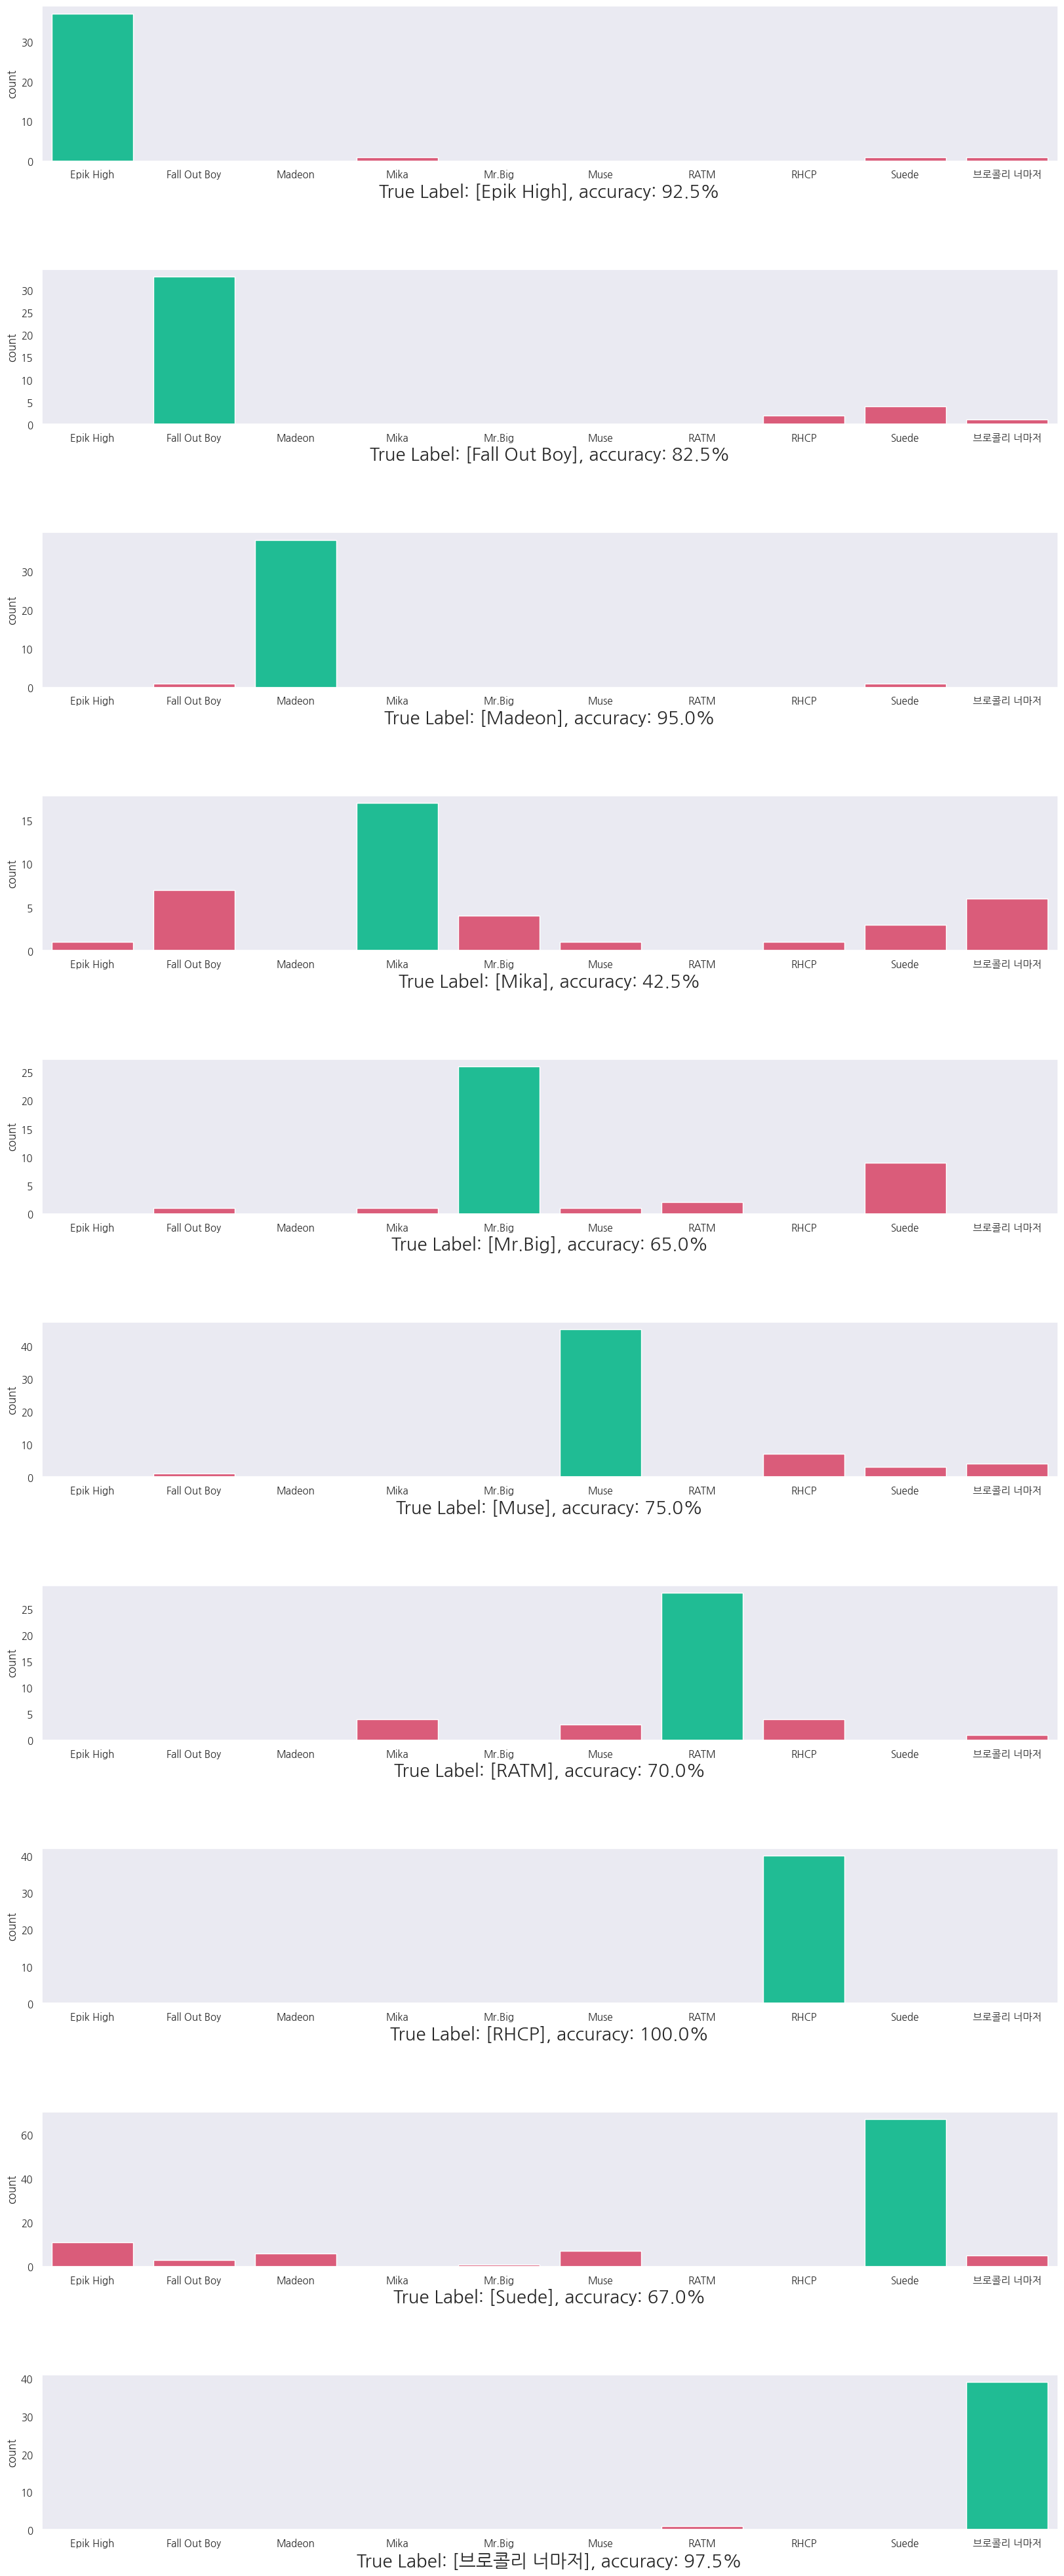

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


fig = plt.figure(figsize=(20, 50))

for subplot_idx, (artist, subdf) in enumerate(df_count.groupby('label_true'), start=1):
    ax = plt.subplot(10, 1, subplot_idx)
    
    GREEN = '#06d6a0'
    RED = '#ef476f'
    palette = {at: (GREEN if at == artist else RED) for at in artists}

    sns.barplot(x="label_pred", y='count', data=subdf, ax=ax, hue='label_pred', palette=palette)
    num_correct_in_artist = df.groupby('artist')['is_correct'].agg('sum')[artist]
    artist_accuracy = 100 * num_correct_in_artist / subdf['count'].sum()
    plt.xlabel(f'True Label: [{artist}], accuracy: {artist_accuracy:.1f}%', fontsize=20)
    
plt.subplots_adjust(hspace=0.7)
plt.show()

### 몇 개를 추려 직접 들어보자

In [6]:
from IPython.display import Audio
import librosa

def show_result(idx):
    row = df.loc[idx]
    true_label = row['artist']
    title = row['title']
    label_predicted = row['label_predicted']
    score = row['score'] * 100

    label_predicted_second = row['label_predicted_second']
    score_second = row['score_second'] * 100

    print(f"[{true_label}]'s Song <{title}> was misclassified as [{label_predicted}]")
    print(f"Score: {score:.2f}")

    print(f"Second guess was [{label_predicted_second}] with score {score_second:.2f}")
    array, rate = librosa.load(f'misclassifed_examples/misclassified_{idx}.wav')
    return Audio(array, rate=rate)

### 오답 예시 1
랩 없이 전주 부분에 해당하는 부분이라 힙합이라는 특성을 잘 잡아내지 못하고 스웨이드로 잘못 짚은 것으로 보인다.

In [7]:
show_result(5)

[Epik High]'s Song <Décalcomanie> was misclassified as [Suede]
Score: 98.47
Second guess was [Epik High] with score 0.59


### 오답 예시 2
곡의 중간에 비는 부분이 있다는 사실을 뒤늦게 알았다. 아무 소리도 없는 빈 구간이었기 때문에 맞출 수 없었던 것 같다.😞 

In [8]:
show_result(122)

[Mika]'s Song <Happy Ending> was misclassified as [Mr.Big]
Score: 95.98
Second guess was [Mika] with score 1.66


C:\Users\user\anaconda3\envs\audioenv\Lib\site-packages\IPython\lib\display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
C:\Users\user\anaconda3\envs\audioenv\Lib\site-packages\IPython\lib\display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


### 오답 예시 3
종반부의 드럼 솔로에 해당하는 구간이라, 뮤즈의 연주와 유사한 면이 있어 틀릴 만 헀던 것 같다.

In [9]:
show_result(170)

[Mr.Big]'s Song <Addicted To That Rush> was misclassified as [Muse]
Score: 98.35
Second guess was [브로콜리 너마저] with score 0.68


### 오답 예시 4

기타 톤이 레드 핫 칠리 페퍼스의 그것과 굉장히 유사해서 이렇게 분류된건 아닐까?

뒤의 드럼 연주는 뮤즈의 색깔이 잘 드러났다고 생각하는데 아쉽다. 😓

In [10]:
show_result(240)

[Muse]'s Song <Assasain> was misclassified as [RHCP]
Score: 97.34
Second guess was [RATM] with score 1.35


### 오답 예시 5
브로콜리 너마저가 대체 어떻게 RATM이 되었나 의아했는데, 곡 후반부의 락사운드가 도드라지는 구간이라 납득이 되었다.😂


In [11]:
show_result(470)

[브로콜리 너마저]'s Song <커뮤니케이션의 이해> was misclassified as [RATM]
Score: 53.32
Second guess was [RHCP] with score 32.17
